In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. 정형 데이터마이닝(data: lotto)
lotto 데이터는 1회부터 859회까지의 로또 당첨번호 (보너스 번호를 제외한 6개의 추첨번호)를 담고 있는 데이터이며, 변수 설명은 아래와 같다. 
- time_id : 로또 회차 (수치형)
- numN : N번 째 당첨번호 6개 (수치형)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ADP/202109스터디/20210710/lotto.csv")

In [ ]:
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time_id  859 non-null    int64
 1   num1     859 non-null    int64
 2   num2     859 non-null    int64
 3   num3     859 non-null    int64
 4   num4     859 non-null    int64
 5   num5     859 non-null    int64
 6   num6     859 non-null    int64
dtypes: int64(7)
memory usage: 47.1 KB


### 1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오 (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.) 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [ ]:
## mlextend로 바꾸라는건가? transaction 데이터가 대체 뭔데...


In [ ]:
min(df['time_id'])

1

time_id는 1부터 859까지의 수가 들어있으므로, 해당 값을 기준으로 data의 row를 오름차순 정렬하고 num1부터 num6까지 값을 array로 묶어서 2차원짜리 array를 만든다.

In [ ]:
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [ ]:
df.sort_values(by = 'time_id', ascending = True, inplace = True)
df.tail()

,time_id,num1,num2,num3,num4,num5,num6
4,855,8,15,17,19,43,44
3,856,10,24,40,41,43,44
2,857,6,10,16,28,34,38
1,858,9,13,32,38,39,43
0,859,8,22,35,38,39,41


In [ ]:
## 잘 정렬되었다. 이제 2차원 array형태인 transaction data로 바꾸어주자
df_ts = []

for i in range(len(df)):
  df_ts.append([df['num1'][i], df['num2'][i], df['num3'][i], df['num4'][i], df['num5'][i], df['num6'][i]])

df_ts

[[8, 22, 35, 38, 39, 41],
 [9, 13, 32, 38, 39, 43],
 [6, 10, 16, 28, 34, 38],
 [10, 24, 40, 41, 43, 44],
 [8, 15, 17, 19, 43, 44],
 [20, 25, 31, 32, 36, 43],
 [2, 8, 23, 26, 27, 44],
 [11, 17, 28, 30, 33, 35],
 [14, 18, 22, 26, 31, 44],
 [16, 20, 24, 28, 36, 39],
 [5, 13, 17, 29, 34, 39],
 [1, 2, 16, 22, 38, 39],
 [12, 16, 26, 28, 30, 42],
 [5, 18, 30, 41, 43, 45],
 [1, 16, 29, 33, 40, 45],
 [7, 8, 13, 15, 33, 45],
 [19, 21, 30, 33, 34, 42],
 [14, 26, 32, 36, 39, 42],
 [5, 11, 14, 30, 33, 38],
 [2, 4, 11, 28, 29, 43],
 [3, 9, 11, 12, 13, 19],
 [9, 14, 17, 33, 36, 38],
 [2, 25, 28, 30, 33, 45],
 [1, 9, 11, 14, 26, 28],
 [9, 10, 13, 28, 38, 45],
 [6, 8, 18, 35, 42, 43],
 [12, 18, 30, 39, 41, 42],
 [13, 14, 19, 26, 40, 43],
 [3, 10, 16, 19, 31, 39],
 [5, 6, 16, 18, 37, 38],
 [4, 5, 31, 35, 43, 45],
 [4, 7, 13, 29, 31, 39],
 [5, 11, 12, 29, 33, 44],
 [13, 16, 24, 25, 33, 36],
 [8, 15, 21, 31, 33, 38],
 [7, 9, 24, 29, 34, 38],
 [12, 18, 24, 26, 39, 40],
 [9, 18, 20, 24, 27, 36],
 [1, 12, 13

In [ ]:
## df_ts는 1회차부터의 로또번호 6개가 순서대로 담겨있는 2D array 형태의 transaction data이다. 
## 이제 가장 많이 등장한 로또번호 10개를 그려보자.
## dictionary와 key 값으로 받은 뒤에 그걸 dataframe으로 바꾸어서 그리면 될 것 같다.

df_dict = {}
for i in range(1,51):
  df_dict[i] = 0

for i in range(len(df_ts)):
  for j in range(0,6):
    df_dict[df_ts[i][j]] += 1

data = pd.DataFrame(list(df_dict.items()),columns = ['num','appear'])
data.head()

,num,appear
0,1,122
1,2,112
2,3,111
3,4,115
4,5,119


<BarContainer object of 10 artists>

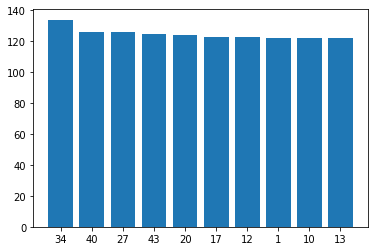

In [ ]:
## 가장 많이 등장한 10개 데이터의 막대그래프를 그리기

data.sort_values(by = 'appear', ascending = False, inplace = True)
data['num'] = data['num'].astype('str')

import matplotlib.pyplot as plt

plt.bar(data['num'][0:10], data['appear'][0:10])

가장 많이 등장한 10개 숫자의 그래프는 위와 같음

### 2) 변환한 데이터에 대해 apriori 함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오 (최소 지지도 : 0.002, 최소 신뢰도: 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_ts).transform(df_ts)
df = pd.DataFrame(te_ary, columns = te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support = 0.002, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.142026,(1)
1,0.130384,(2)
2,0.129220,(3)
3,0.133877,(4)
4,0.138533,(5)
...,...,...
6358,0.002328,"(40, 43, 13, 14, 26)"
6359,0.002328,"(14, 15, 18, 21, 26)"
6360,0.002328,"(40, 14, 27, 30, 31)"
6361,0.002328,"(34, 44, 15, 19, 21)"


In [ ]:
## 신뢰도가 0.8 이상이고 조합항목의 수가 2이상 6이하인, 향상도 상위 30개의 규칙을 확인하고 csv파일로 저장
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [ ]:
## antecedents의 length를 새로운 데이터 column으로 빼서 그 값이 2와 6 사이인 데이터를 추출함
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
output = rules[(rules['antecedents_len']>=2) & (rules['antecedents_len']<=6)]
output

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,3
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf,3
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
...,...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf,4
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf,3
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3


In [ ]:
output.sort_values(by = 'lift', ascending = False, inplace = True)
output.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
646,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
666,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3
653,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,3


In [ ]:
output.head(30).to_csv("output.csv", index = False)

# 2. 통계분석 (data : FIFA)
FIFA 데이터는 가상의 온라인 축구게임에 등장하는 축구 선수의 주요 특징과 신체 정보에 대한 데이터이며, 변수 설명은 아래와 같다.
- ID : 각 축구선수의 고유번호 (수치형)
- Age : 나이 (수치형)
- Nationality : 국적 (범주형)
- Overall : 선수의 능력치 (수치형)
- Club : 현재 소속된 클럽 (범주형)
- Preferred Foot : 주로 사용하는 발 (Left, Right)
- Work Rate : 공격 운동량/ 방어 운동량 (범주형)
- Position : 선수의 포지션 (범주형)
- Jersey Number : 선수의 등번호 (수치형)
- Contract Valid Until : 계약 만료 년도 (수치형)
- Height : 피트와 인치 단위로 표현된 선수의 키 (문자형)
- Weight_ib : 파운드 단위로 표현된 선수의 몸무게 (수치형)
- Release_Clause : 해체 조항 금액
- Value : 선수의 현재 시장가치 (수치형)
- Wage : 주급 (수치형)

### 1) FIFA 데이터에서 각 선수들의 키는 Height변수에 피트와 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Heigt_cm을 생성하시오.
("'" 앞의 숫자는 피트이며, "'" 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [ ]:
df_fifa = pd.read_csv("/content/drive/MyDrive/ADP/202109스터디/20210710/FIFA.csv", encoding = 'euc-kr')

In [ ]:
df_fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [ ]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    16642 non-null  int64 
 1   Name                  16642 non-null  object
 2   Age                   16642 non-null  int64 
 3   Nationality           16642 non-null  object
 4   Overall               16642 non-null  int64 
 5   Club                  16642 non-null  object
 6   Preferred_Foot        16642 non-null  object
 7   Work_Rate             16642 non-null  object
 8   Position              16642 non-null  object
 9   Jersey_Number         16642 non-null  int64 
 10  Contract_Valid_Until  16642 non-null  int64 
 11  Height                16642 non-null  object
 12  Weight_lb             16642 non-null  int64 
 13  Release_Clause        16642 non-null  int64 
 14  Value                 16642 non-null  int64 
 15  Wage                  16642 non-null

In [ ]:
def calculate_height(x):
  a = iter(x['Height'].split("'"))
  return (int(next(a)) * 30) + (int(next(a)) * 2.5)

df_fifa['Height'] = df_fifa.apply(lambda x: calculate_height(x), axis = 1)

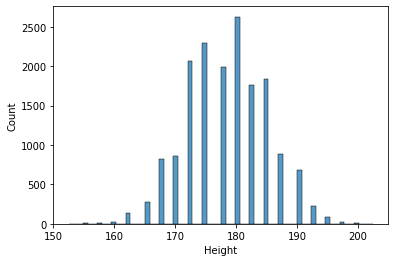

In [ ]:
## 축구선수들의 키 분포를 확인하여 제대로 변환되었는지 체크
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df_fifa, x = 'Height')
plt.show()

### 2) 아래 표를 참고하여 Position 변수를 재범주화

In [ ]:
Forward = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
Midfielder = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
Defender = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
GoalKeeper = ['GK']

In [ ]:
df_fifa.loc[df_fifa['Position'].isin(Forward), 'Position'] = 'Forward'
df_fifa.loc[df_fifa['Position'].isin(Midfielder), 'Position'] = 'Midfielder'
df_fifa.loc[df_fifa['Position'].isin(Defender), 'Position'] = 'Defender'
df_fifa.loc[df_fifa['Position'].isin(GoalKeeper), 'Position'] = 'GoalKeeper'

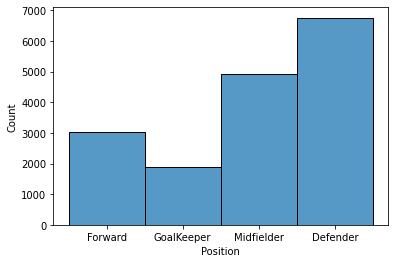

In [ ]:
sns.histplot(data = df_fifa, x = 'Position')
plt.show()

### 3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 그리고 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오

In [ ]:
## 참조 : https://www.pythonfordatascience.org/anova-python/

가. ANOVA 검정을 수행하기 위해 데이터가 ANOVA의 모수적 가정을 만족하는지 확인한다
- 독립성 : 집단 안의 데이터 수준은 서로 독립인가 (데이터가 중복되지 않았는지)
- 정규성 : 모델의 잔차가 정규성을 만족하는가.
- 등분산성 : 집단 안의 수준별로 동일한 종속변수 분산을 가지고 있어야 함

In [ ]:
## 정규성 (50개 이하의 샘플 : Shapiro-Wilk, 50개 이상 샘플 : Komogorov-Smirnov 권장)
import scipy.stats as stats
stats.shapiro(model.resid)   ## normally dstributed 하지 않은데??

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.419644296169281, 0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


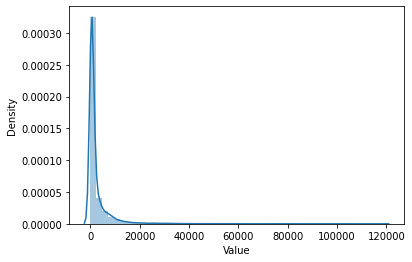

In [ ]:
sns.distplot(df_fifa['Value'])
plt.legend

만약에 데이터가 normality를 만족하지 않는다면, 정규성을 만족하도록 데이터를 변형하거나, 비모수적인 방법인 Welch's ANOVA나 Kruskal- Wallis ANOVA를 사용해야 한다. (그러나 여기서는 데이터가 충분히 많다고 보았기 때문에 정규성 문제를 넘어가도록 하겠다)

In [ ]:
## 등분산성 검정 -> anova 자체가 분산에 robust하기 때문에 그룹 간 4배 정도의 차이가 나지 않으면 무시해도 상관 없음.
stats.levene(df_fifa['Value'][df_fifa['Position']=='Forward'],
             df_fifa['Value'][df_fifa['Position']=='GoalKeeper'],
             df_fifa['Value'][df_fifa['Position']=='Midfielder'],
             df_fifa['Value'][df_fifa['Position']=='Defender'])

LeveneResult(statistic=34.306913801672735, pvalue=4.274807772841852e-22)

In [ ]:
##scipy를 활용한 oneway anova
import scipy.stats as stats
stats.f_oneway(df_fifa['Value'][df_fifa['Position']=='Forward'],
               df_fifa['Value'][df_fifa['Position']=='GoalKeeper'],
               df_fifa['Value'][df_fifa['Position']=='Midfielder'],
               df_fifa['Value'][df_fifa['Position']=='Defender'])

F_onewayResult(statistic=41.87390580849466, pvalue=5.988667429906719e-27)

Position에 따른 Value 차이의 검정 결과 4개의 포지션 중 적어도 한 포지션의 Value 평균에 차이가 있음을 알 수 있다. Ad hoc test를 통해 어떤 포지션에서 차이가 발생하는지 구체적으로 알아보겠다.
Multiple Anova의 사후검정은 대표적으로 Tukey, Scheffe, Bonferroni 테스트가 존재한다.
여기서 Tukey test는 표본 크기가 동일한 그룹의 평균을 pairwise하게 비교할 때 사용한다. (만약 sample size가 불일치할 시, Tukey-Kramer 방법을 이용할 수 있음)
Scheffe test는 sample size에 구애받지 않으나, 그룹 간의 pairwise한 평균비교를 넘어 더 많은 조합을 고려하므로 (ex. a와 b의 모평균 합 = c와 d의 모평균 합) 신뢰구간이 넓어지며, 검정력이 낮아지게 된다.
Bonferroni test 또한 그룹 간 표본크기에 영향을 받지 않는다. 이 방식은 보통 특정한 그룹 간의 비교를 사전에 생각해두었을 때 사용한다.
이번 사후분석에서는 특별히 정해진 그룹 간의 비교가 아니라 가능한 모든 조합을 탐색하여 평균의 차이가 발생하는 그룹을 탐지하고자 하므로 Tukey-Kramer 방식을 사용하도록 하겠다.


In [ ]:
## tukey test 진행
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_fifa['Value'], df_fifa['Position'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender Midfielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward Midfielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper Midfielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'귀무가설 : 두 집단의 모평균 차이가 존재하지 않는다' 하에서 4개 포지션의 pairwise한 조합에 대한 검정 결과, 귀무가설을 기각하지 못하는 조합은 'Forward'와 'Midfielder'의 조합이었다. 즉 Forward와 Midfielder 포지션은 평균 Value가 통계적으로 비슷하다고 볼 수 있으나, 다른 집단은 서로 Value에 차이가 존재한다. 이로서 축구선수는 Position에 따라 기대 Value가 다른 경향이 크다고 말할 수 있다.

In [ ]:
## statsmodel을 활용한 one way anova
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Value ~ Position', data = df_fifa).fit()
aov_table = sm.stats.anova_lm(model, typ = 2)   #typ은 anova_lm method의 sum of square 계산 방식을 결정함
aov_table

,sum_sq,df,F,PR(>F)
Position,4.081181e+09,3.0,41.873906,5.988667e-27
Residual,5.405330e+11,16638.0,NaN,NaN


### 4) Preferred Foot과 Position_Class 변수에 따라 Value의 차이가 있는지 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols('Value ~ C(Position) + C(Preferred_Foot) + C(Position):C(Preferred_Foot)', df_fifa).fit()
print(anova_lm(lm))

                                    df        sum_sq  ...          F        PR(>F)
C(Position)                        3.0  4.081181e+09  ...  41.912369  5.658225e-27
C(Preferred_Foot)                  1.0  1.522715e+08  ...   4.691332  3.032930e-02
C(Position):C(Preferred_Foot)      3.0  4.736156e+08  ...   4.863874  2.207249e-03
Residual                       16634.0  5.399071e+11  ...        NaN           NaN

[4 rows x 5 columns]


In [ ]:
print(5.658225e-27>0.05)
print( 3.032930e-02>0.05)
print(2.207249e-03>0.05)

False
False
False


1. Position에 따른 Value의 평균 차이에서 귀무가설이 기각되므로 Position에 따른 Value차이가 존재한다
2. 마찬가지로 선수가 선호하는 발에 따른 Value의 차이가 존재한다.
3. Position과 Preferred Foot 사이에 교호작용이 존재한다고 말할 수 있다.

### 5)Age, Overall, Wage, Height_cm, Weight_Ib가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

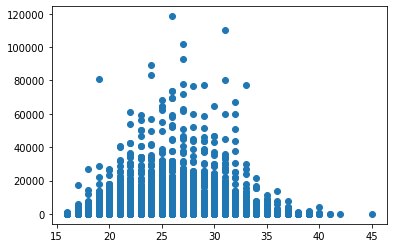

In [ ]:
plt.scatter(df_fifa['Age'], df_fifa['Value'])

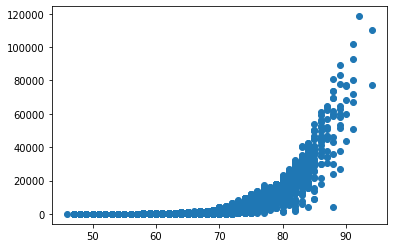

In [ ]:
plt.scatter(df_fifa['Overall'], df_fifa['Value'])  ## value에 log를 씌우면 엄청 잘 나올 것 같은데..

In [ ]:
import numpy as np

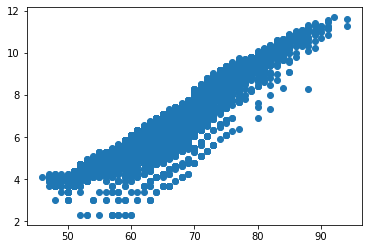

In [ ]:
plt.scatter(df_fifa['Overall'], np.log(df_fifa['Value']))

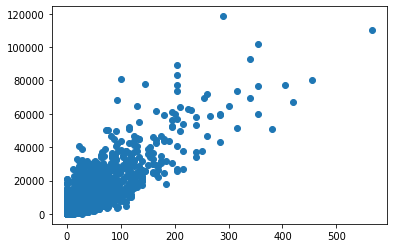

In [ ]:
plt.scatter(df_fifa['Wage'], df_fifa['Value'])

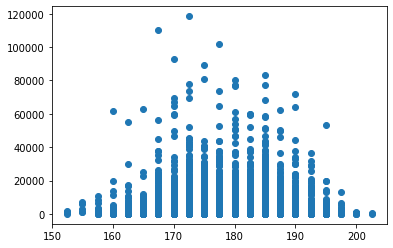

In [ ]:
plt.scatter(df_fifa['Height'], df_fifa['Value'])

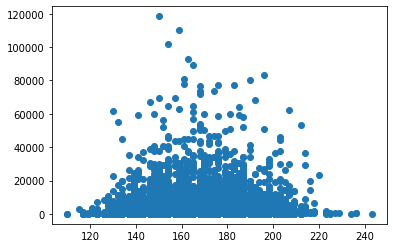

In [ ]:
plt.scatter(df_fifa['Weight_lb'], df_fifa['Value'])

In [ ]:
## 전진 선택법
variables = ['Age', 'Overall', 'Wage', 'Height', 'Weight_lb'] ## 설명 변수 리스트
 
y = df_fifa['Value'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_fifa[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_fifa[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
selected_variables

['Overall', 'Age', 'Wage', 'Height']

전진선택법 결과 모델에 유의미한 것으로 나타난 변수는 Overall, Age, Wage, Height의 4개 였다. 위 4개의 변수를 가지고 Linear Regression을 만들면 그 결과는 아래와 같다. 